#Pregunta 1.

Nuestro propio intento...
Calcular la distancia entre $H_1:wx+b=1$ y $H_2:wx+b=-1$

Sabemos que los hiperplanos son paralelos, por lo tanto podemos tomar un punto $P_0$ de un hiperplano y calcular la distancia de un punto al otro hiperplano.
Obtendremos $P_0$ de $H_2:w_1x_1+w_2x_w+\ldots+w_ix_i+\ldots+w_nx_n+b=-1$ para ello consideramos $x_1=x_2=\ldots=x_{i-1}=x_{i+1}=\ldots=x_n=0$ por lo que ahora tenemos $H_2:w_ix_i+b=-1$ y despejamos $x_i=\frac{-1-b}{w_i}$, entonces:
$$P_0=(0,0,\ldots,\frac{-1-b}{w_i},\ldots,0,0)$$
Ahora usando la ecuación para hallar la distancia de un punto $P_0=(p_1,\ldots,p_n)$ a un hiperplano $\pi\equiv A_1x_1+\ldots+A_nx_n+b=0$

$$d(P_0,\pi)=\left\lvert \frac{A_1x_1+\ldots+A_nx_n+b}{\sqrt{A_1^2+\ldots+A_n^2}}\right\rvert$$

Sustituyendo:
$$d(P_0,H_1)=\left\lvert \frac{w_1*0+w_2*0+\ldots+w_i*\frac{-1-b}{w_i}+\ldots+w_n*0+b-1}{\sqrt{w_1^2+\ldots+w_n^2}} \right\rvert$$
$$= \left\lvert \frac{-2}{||w||} \right\rvert = \frac{2}{||w||}$$

Investigando la demostración:$$$$
Sea $x_+$ un punto sobre el hiperplano: $w \cdot x_+ +b=1$
y sea $x_-$ un punto sobre el hiperplano: $w \cdot x_- +b = -1$ $$$$
La distancia entre los hiperplanos está dado por la proyección de $(x_+ - x_-)$ en el vector normal $w$.
$$z=(x_++ - x_-)\cdot \frac{w}{||w||}=\frac{x_+\cdot w - x_- \cdot w}{||w||}$$
$$=\frac{1-b-(-1-b)}{||w||}=\frac{2}{||w||}$$


# Pregunta 2



In [ ]:
pip install qpsolvers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from qpsolvers import solve_qp
### Se necesita el archivo iris.csv para su funcionamiento.

Una tarea que se deja a todo estudiante de ciencia de datos es la implementación del
algoritmo de la MVS por cuenta propia. Debemos mantener viva esa bonita tradición.
Implementar su propia versión de MVS como se expone en la sección 2.2. Nota: El paso
más complejo es resolver el problema de optimización cuadrática. Utilicen cualquier
librerı́a que pueda facilitarles la resolución de ese paso.


In [ ]:
X=[]
Y=[]
with open("iris.csv", "r") as f:
  for line in f:
    data=list(line.split(","))
    try:
      X.append([float(i) for i in data[:4]])
    except:
      pass
    if(data[-1]=="Iris-setosa\n"):
      Y.append(-1)
    elif(data[-1]=="Iris-versicolor\n"):
      Y.append(1)
    #elif(data[-1]=="Iris-virginica\n" or data[-1]=="Iris-virginica"):
    #  Y.append(2)
X= X[0:100]
print(X)
print(Y)

[[5.1, 3.5, 1.4, 0.2], [4.9, 3.0, 1.4, 0.2], [4.7, 3.2, 1.3, 0.2], [4.6, 3.1, 1.5, 0.2], [5.0, 3.6, 1.4, 0.2], [5.4, 3.9, 1.7, 0.4], [4.6, 3.4, 1.4, 0.3], [5.0, 3.4, 1.5, 0.2], [4.4, 2.9, 1.4, 0.2], [4.9, 3.1, 1.5, 0.1], [5.4, 3.7, 1.5, 0.2], [4.8, 3.4, 1.6, 0.2], [4.8, 3.0, 1.4, 0.1], [4.3, 3.0, 1.1, 0.1], [5.8, 4.0, 1.2, 0.2], [5.7, 4.4, 1.5, 0.4], [5.4, 3.9, 1.3, 0.4], [5.1, 3.5, 1.4, 0.3], [5.7, 3.8, 1.7, 0.3], [5.1, 3.8, 1.5, 0.3], [5.4, 3.4, 1.7, 0.2], [5.1, 3.7, 1.5, 0.4], [4.6, 3.6, 1.0, 0.2], [5.1, 3.3, 1.7, 0.5], [4.8, 3.4, 1.9, 0.2], [5.0, 3.0, 1.6, 0.2], [5.0, 3.4, 1.6, 0.4], [5.2, 3.5, 1.5, 0.2], [5.2, 3.4, 1.4, 0.2], [4.7, 3.2, 1.6, 0.2], [4.8, 3.1, 1.6, 0.2], [5.4, 3.4, 1.5, 0.4], [5.2, 4.1, 1.5, 0.1], [5.5, 4.2, 1.4, 0.2], [4.9, 3.1, 1.5, 0.1], [5.0, 3.2, 1.2, 0.2], [5.5, 3.5, 1.3, 0.2], [4.9, 3.1, 1.5, 0.1], [4.4, 3.0, 1.3, 0.2], [5.1, 3.4, 1.5, 0.2], [5.0, 3.5, 1.3, 0.3], [4.5, 2.3, 1.3, 0.3], [4.4, 3.2, 1.3, 0.2], [5.0, 3.5, 1.6, 0.6], [5.1, 3.8, 1.9, 0.4], [4.8, 3.0

Revolvemos y dividimos los datos en un conjunto de entrenamiento con el 75% de estos y el otro 25% para el conjunto de prueba.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

Ahora definimos los vectores y matrices pertenecientes a la función a optimizar con sus respectivs restricciones.

In [ ]:
y = np.array(y_train).reshape(-1,1) * 1.
X_dash = y * X_train
H = np.dot(X_dash , X_dash.T) * 1.

P = H
q = -np.ones(len(X_train))
G = -np.eye(len(X_train))
h = np.zeros(len(X_train))
A = y.reshape(-1,)
b = np.array(0)

Para optimizar utilizamos esta función "solve_qp" que nos regresa el valor de las alfas que optimizan la función.

In [ ]:
alfas = solve_qp(P, q, G, h, A, b, solver="osqp")
print("QP solution: x = {}".format(alfas))

QP solution: x = [5.93690342e-05 1.49588894e-04 3.54547411e-05 1.71045782e-04
 1.87653946e-04 1.47717632e-04 1.41654567e-04 7.56173732e-05
 9.66494657e-05 1.77723573e-04 1.26028180e-04 1.70187257e-04
 3.18782781e-05 1.31214215e-04 1.73979148e-04 3.72410489e-05
 1.77438270e-04 2.98376604e-05 4.88818516e-05 1.49302003e-04
 3.82653882e-05 1.57901678e-01 5.07855363e-05 1.94800425e-04
 1.64014576e-04 1.38225459e-04 1.79050580e-04 7.67160642e-02
 5.32888033e-05 4.64728179e-05 1.36047222e-04 1.63181606e-04
 1.59178875e-04 1.66676940e-04 1.39610585e-04 4.99761593e-05
 5.14397899e-05 1.59594964e-04 2.21346337e-05 5.75644284e-05
 7.39322023e-05 5.21749225e-05 1.54312174e-04 3.37406161e-05
 1.28184242e-04 1.41173173e-04 1.44214146e-04 1.35997585e-04
 2.05302613e-04 1.67174914e-04 8.60822683e-05 1.50198722e-04
 4.74982243e-05 3.22261433e-05 6.91319682e-01 6.39502945e-05
 1.93528781e-04 5.73520161e-05 4.21007508e-05 3.37107558e-05
 6.55278039e-05 4.49680636e-05 3.86559904e-05 1.71554214e-04
 5.0352

/usr/local/lib/python3.8/dist-packages/qpsolvers/conversions/warnings.py:35: UserWarning: Converted P to scipy.sparse.csc.csc_matrix
For best performance, build P as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/qpsolvers/conversions/warnings.py:35: UserWarning: Converted G to scipy.sparse.csc.csc_matrix
For best performance, build G as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/qpsolvers/conversions/warnings.py:35: UserWarning: Converted A to scipy.sparse.csc.csc_matrix
For best performance, build A as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(


In [ ]:
w = ((y_train * alfas).T @ X_train).reshape(-1,1)
print(w.shape)
S = np.where(alfas > 0)
print(len(S[0]))
y_s = np.array(y_train)[S].reshape(len(S[0]),1)
print(y_s.shape)
X_s = np.array(X_train)[S]
print(X_s.shape)
alfa_s = np.array(alfas)[S].reshape(len(S[0]),1)
print(alfa_s.shape)

(4, 1)
80
(80, 1)
(80, 4)
(80, 1)


In [ ]:
b=0
a=0
for i in range(len(S[0])):
  for j in range(len(S[0])):
    b = b + y_s[i] - alfa_s[j] * y_s[j] * np.dot(X_s[j], X_s[i])

b = b/len(S[0])
print(b)

X_test = np.array(X_test)

resultados = np.empty(len(X_test))
resultados = np.sign(np.dot(w.T,X_test.T)+b)

validar = (resultados == y_test).flatten()
validar
validar = np.where(validar == 1)
validar
print("Esta maquina de vectores creada obtuvo los siguiente resultado en la prueba:", len(validar[0]),"/ 25 valores de prueba.")


[-0.80507686]
Esta maquina de vectores creada obtuvo los siguiente resultado en la prueba: 10 / 25 valores de prueba.


 hagamos con sklearn

In [ ]:
from sklearn import datasets, svm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, f1_score, accuracy_score, precision_score

In [ ]:
iris = datasets.load_iris()# esto es un  diccionario que se llama iris

In [ ]:
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [ ]:
print(iris['data'])
print(iris['target'])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(iris['data'], iris['target'], test_size = 0.2)
train_errors, test_errors = [], []

In [ ]:
#clf = svm.SVC(kernel = 'linear', C=1) este es el normal de clase
#clf = svm.SVC(kernel = 'rbf', C=1, gamma = 0.1)  #con un kernet radial
#clf = svm.SVC(kernel = 'poly', C=1, degree = 3) # polinomial
clf = svm.SVC(kernel = 'sigmoid', C=1, coef0= .5) #kernel signmoide


In [ ]:
for x in range(10, len(iris['data'])):
  clf.fit(x_train[:x], y_train[:x])
  y_train_predict = clf.predict(x_train[:x])
  y_test_predict = clf.predict(x_test[:x])
  train_errors.append(accuracy_score(y_train[:x], y_train_predict))
  test_errors.append(accuracy_score(y_test[:x], y_test_predict))

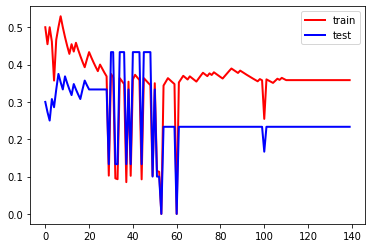

In [ ]:
plt.plot(train_errors, 'r-', linewidth = 2, label = 'train')
plt.plot(test_errors, 'b-', linewidth =2 , label = 'test')
plt.legend()

# Pregunta 3. Investigar qué es el teorema de Mercer y cuál es su relación con la MVS.

Mercer’s Theorem determines which functions can be used as a kernel function. In mathematics, specifically functional analysis, Mercer's theorem states that a symmetric, and positive-definite matrix can be represented as a sum of a convergent sequence of product functions. From Mercer’s theorem a matrix is a Gram Matrix if and only if it is positive and semi-definite, i.e. it is an inner product matrix in some space [CST00]. For a function to be a kernel, then the inner product matrix created by a dataset should necessarily be positive-semi-definite. In plain terms, for some function K that takes two input vectors as arguments, if we apply K to every possible pair of points in our dataset, and write out a corresponding symmetric matrix *G* whose *i,j*th element corresponds to $K(x_i,x_j)$, then K is a valid kernel if and only if that matrix G is positive semi-definite.


#Pregunta 4.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

In [ ]:
X = np.c_[
    (0.4, -0.7),
    (-1.5, -1),
    (-1.4, -0.9),
    (-1.3, -1.2),
    (-1.1, -0.2),
    (-1.2, -0.4),
    (-0.5, 1.2),
    (-1.5, 2.1),
    (1, 1),
    # --
    (1.3, 0.8),
    (1.2, 0.5),
    (0.2, -2),
    (0.5, -2.4),
    (0.2, -2.3),
    (0, -2.7),
    (1.3, 2.1),
].T
print(X)

[[ 0.4 -0.7]
 [-1.5 -1. ]
 [-1.4 -0.9]
 [-1.3 -1.2]
 [-1.1 -0.2]
 [-1.2 -0.4]
 [-0.5  1.2]
 [-1.5  2.1]
 [ 1.   1. ]
 [ 1.3  0.8]
 [ 1.2  0.5]
 [ 0.2 -2. ]
 [ 0.5 -2.4]
 [ 0.2 -2.3]
 [ 0.  -2.7]
 [ 1.3  2.1]]


In [ ]:
Y = [0] * 8 + [1] * 8

Ajustar los modelos con distintos kernels y se grafican.

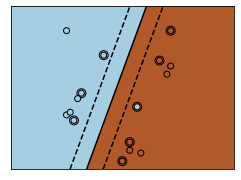

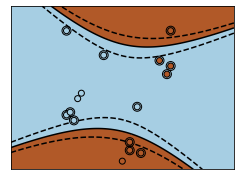

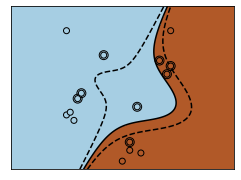

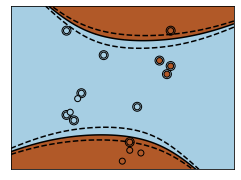

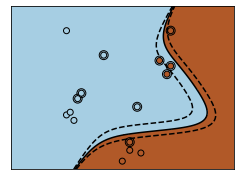

In [ ]:
fignum = 1

# ajustar el modelo (fi)
for grado in range(1,6):
    clf = svm.SVC(kernel="poly", degree=grado)
    clf.fit(X, Y)

    #graficar el hiperplano separador y puntos de datos
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()

    plt.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=80,
        facecolors="none",
        zorder=10,
        edgecolors="k",
    )
    plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired, edgecolors="k")

    plt.axis("tight")
    x_min = -3
    x_max = 3
    y_min = -3
    y_max = 3

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Graficos de colores
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(
        XX,
        YY,
        Z,
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
        levels=[-0.5, 0, 0.5],
    )

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1
plt.show()